In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings                     #ignore warning
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
dataset = pd.read_csv('fish.csv')
dataset.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


## Discover and visualize the data to gain insights

In [54]:
dataset.shape

(159, 6)

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [20]:
x = dataset.iloc[:,1:]

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


## Scaling 

In [22]:
from sklearn.preprocessing import MinMaxScaler
Scal = MinMaxScaler()
xx = Scal.fit_transform(x)

In [25]:
col = ['Weight', 'Length', 'Diagonal', 'Height', 'Width']

In [26]:
x = pd.DataFrame(xx,columns=col)

In [27]:
x

,Weight,Length,Diagonal,Height,Width
0,0.146667,0.309091,0.358108,0.568334,0.418978
1,0.175758,0.325455,0.378378,0.624055,0.459235
2,0.206061,0.329091,0.376689,0.618123,0.514279
3,0.220000,0.374545,0.417230,0.638566,0.480365
4,0.260606,0.374545,0.425676,0.621966,0.576004
...,...,...,...,...,...
154,0.007394,0.069091,0.077703,0.021012,0.048771
155,0.008121,0.072727,0.079392,0.040723,0.031208
156,0.007394,0.083636,0.084459,0.031842,0.029347
157,0.011939,0.107273,0.108108,0.066424,0.143719


In [28]:
x.isna().sum().sum() #no null values are availavle here

0

In [37]:
dataset['Species'].nunique()

7

In [38]:
dataset['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

## Encoding 

In [39]:
from sklearn.preprocessing import LabelEncoder
LabEnc = LabelEncoder()
y = LabEnc.fit_transform(dataset['Species'])

In [40]:
LabEnc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [43]:
y = pd.DataFrame(y, columns=['Species'])

In [46]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [47]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

<h1 style="color:red"> Multiple Linear regression Formula</h1>

<img src='multiLinear.png' height='800' width='600'>

In [49]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [51]:
LR.fit(Xtrain,ytrain)

LinearRegression()

## Accuracy

In [56]:
LR.score(Xtest,ytest) * 100   #Linear Regression Model is not appropriate for this dataset

62.62402788230907

In [57]:
y_predict = LR.predict(Xtest)

In [58]:
y_predict

array([[ 2.64692329],
       [ 3.65716414],
       [ 2.35327695],
       [ 2.50869907],
       [ 3.50657993],
       [-0.83062739],
       [ 4.27821753],
       [ 3.0654857 ],
       [ 2.87682043],
       [ 2.62845574],
       [ 1.20647066],
       [ 2.3899014 ],
       [ 0.30158008],
       [ 1.16756531],
       [-0.36518323],
       [-0.87968249],
       [ 2.98456154],
       [ 2.14787558],
       [ 1.87289067],
       [ 0.54141033],
       [ 4.12819415],
       [-0.79464735],
       [-0.36011155],
       [ 0.72077238],
       [-0.94815103],
       [ 2.36069396],
       [ 2.70366238],
       [ 2.71892148],
       [ 4.25708613],
       [ 3.96362629],
       [ 2.28919115],
       [ 3.46105355],
       [ 3.08847654],
       [ 1.33455336],
       [ 1.45839285],
       [ 2.53025955],
       [ 3.46933845],
       [ 3.58647853],
       [ 0.17788827],
       [ 2.16902571],
       [ 0.36286458],
       [ 2.35667378],
       [ 4.19081983],
       [ 3.83012878],
       [ 1.42676054],
       [ 3

In [59]:
dataset.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [62]:
data = np.c_[Xtest, ytest, y_predict]

In [63]:
dataset2 = pd.DataFrame(data, columns=['Weight', 'Length', 'Diagonal', 'Height', 'Width','Species','Species_Predict'])

In [64]:
dataset2.head(10)

,Weight,Length,Diagonal,Height,Width,Species,Species_Predict
0,0.047273,0.187273,0.179054,0.201456,0.292597,2.0,2.646923
1,0.008121,0.072727,0.079392,0.040723,0.031208,5.0,3.657164
2,0.121212,0.434545,0.439189,0.222862,0.328146,3.0,2.353277
3,0.163636,0.320000,0.336149,0.386102,0.451060,6.0,2.508699
4,0.090909,0.265455,0.265203,0.202576,0.363442,2.0,3.506580
5,0.606061,0.520000,0.570946,1.000000,0.783068,0.0,-0.830627
6,0.004242,0.040000,0.047297,0.000000,0.014208,5.0,4.278218
7,0.109091,0.305455,0.322635,0.311006,0.402909,4.0,3.065486
8,0.113939,0.294545,0.293919,0.290505,0.439530,2.0,2.876820
9,0.757576,0.865455,0.859797,0.519944,0.836900,3.0,2.628456


<Axes: ylabel='Density'>

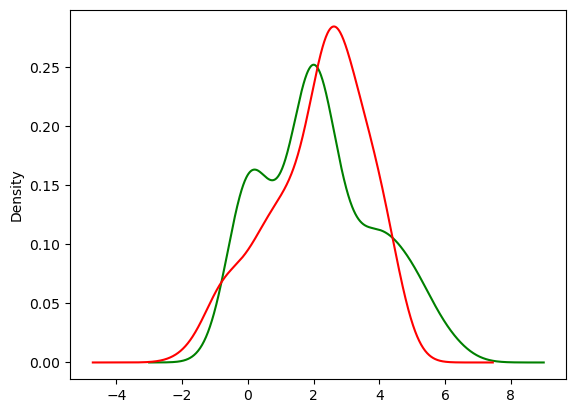

In [65]:
dataset2['Species'].plot(kind='kde',color='g') #green line---> original
dataset2['Species_Predict'].plot(kind='kde',color='r') #red line-----> Predicted